In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
file_path = '/content/drive/My Drive/Courses/Intro-to-ML/Datasets//ML OFFICIAL.csv'
dataset = pd.DataFrame(pd.read_csv(file_path))
dataset.head()

,Date,HomeTeam,AwayTeam,Full Time Home Team Goals,Full Time Away Team Goals,Full Time Result,Half Time Home Team Goals,Half Time Away Team Goals,Half Time Result,Referee,...,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA
0,05/08/2022,Crystal Palace,Arsenal,0,2,A,0,1,A,A Taylor,...,1.85,4.50,3.65,1.89,4.40,3.5,1.83,4.60,3.5,1.87
1,06/08/2022,Fulham,Liverpool,2,2,D,1,0,H,A Madley,...,1.27,11.20,6.22,1.28,12.00,5.5,1.27,13.00,6.0,1.25
2,06/08/2022,Bournemouth,Aston Villa,2,0,H,1,0,H,P Bankes,...,2.05,3.93,3.58,2.04,3.75,3.3,2.05,3.75,3.3,2.00
3,06/08/2022,Leeds,Wolves,2,1,H,1,1,D,R Jones,...,3.15,2.39,3.33,3.30,2.25,3.3,3.20,2.30,3.2,3.10
4,06/08/2022,Newcastle,Nott'm Forest,2,0,H,0,0,D,S Hooper,...,5.50,1.71,3.74,5.83,1.67,3.7,5.25,1.62,3.7,5.50


In [4]:
result_mapping = {'H': 1, 'A': 0, 'D': 2}
dataset['Full Time Result'] = dataset['Full Time Result'].map(result_mapping)

dataset['HomeTeam'] = dataset['HomeTeam'].astype('category').cat.codes
dataset['AwayTeam'] = dataset['AwayTeam'].astype('category').cat.codes
dataset['Referee'] = dataset['Referee'].astype('category').cat.codes

dataset.head(21)


,Date,HomeTeam,AwayTeam,Full Time Home Team Goals,Full Time Away Team Goals,Full Time Result,Half Time Home Team Goals,Half Time Away Team Goals,Half Time Result,Referee,...,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA
0,05/08/2022,15,0,0,2,0,0,1,A,4,...,1.85,4.50,3.65,1.89,4.40,3.50,1.83,4.60,3.50,1.87
1,06/08/2022,18,24,2,2,2,1,0,H,1,...,1.27,11.20,6.22,1.28,12.00,5.50,1.27,13.00,6.00,1.25
2,06/08/2022,6,1,2,0,1,1,0,H,100,...,2.05,3.93,3.58,2.04,3.75,3.30,2.05,3.75,3.30,2.00
3,06/08/2022,22,44,2,1,1,1,1,D,117,...,3.15,2.39,3.33,3.30,2.25,3.30,3.20,2.30,3.20,3.10
4,06/08/2022,28,30,2,0,1,0,0,D,130,...,5.50,1.71,3.74,5.83,1.67,3.70,5.25,1.62,3.70,5.50
5,06/08/2022,39,35,4,1,1,2,1,H,2,...,7.75,1.37,5.39,9.11,1.35,5.00,8.50,1.33,5.00,9.00
6,06/08/2022,17,13,0,1,0,0,1,A,20,...,1.63,6.04,4.06,1.63,5.80,3.75,1.62,5.75,3.70,1.60
7,07/08/2022,23,8,2,2,2,1,0,H,62,...,3.55,2.07,3.69,3.74,2.00,3.60,3.50,1.95,3.50,3.60
8,07/08/2022,26,9,1,2,0,0,2,A,104,...,5.75,1.65,4.14,5.68,1.60,3.90,5.50,1.57,3.80,5.75
9,07/08/2022,42,25,0,2,0,0,1,A,81,...,1.37,8.58,5.48,1.38,9.00,5.00,1.33,8.50,5.00,1.33


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
features = list(dataset.columns[-18:])  #last 18 columns betting ods companies evaluation
features.extend(['HomeTeam', 'AwayTeam', 'Referee'])  #Adding home team Away Team to our feature
X = dataset[features]
y = dataset['Full Time Result'] #Our target is who won at the end so we can classify them

In [ ]:
print(X)

      B365H  B365D  B365A    BWH   BWD   BWA    IWH   IWD   IWA    PSH  ...  \
0      4.20   3.60   1.85   4.33  3.50  1.87   4.30  3.55  1.85   4.50  ...   
1     11.00   6.00   1.25  10.00  5.75  1.28  12.00  5.75  1.27  11.20  ...   
2      3.75   3.50   2.00   3.75  3.40  2.00   3.65  3.45  2.05   3.93  ...   
3      2.25   3.40   3.20   2.30  3.30  2.95   2.30  3.30  3.15   2.39  ...   
4      1.66   3.80   5.25   1.65  3.80  5.50   1.65  3.80  5.50   1.71  ...   
...     ...    ...    ...    ...   ...   ...    ...   ...   ...    ...  ...   
8735   3.60   3.25   1.82   3.80  3.20  1.65   4.20  3.40  1.70   4.20  ...   
8736   1.90   3.25   3.50   1.90  2.90  3.20   1.90  3.20  3.50   1.90  ...   
8737   2.20   3.20   2.82   2.10  2.90  2.90   2.38  3.30  2.50   2.38  ...   
8738   2.82   3.15   2.20   2.35  3.00  2.35   2.63  3.25  2.30   2.63  ...   
8739   2.75   3.20   2.24   2.80  3.00  2.10   2.60  3.25  2.35   2.60  ...   

       PSA    WHH  WHD   WHA    VCH   VCD   VCA  Ho

In [8]:
print(y)

0       0
1       2
2       1
3       1
4       1
       ..
8735    0
8736    1
8737    1
8738    1
8739    1
Name: Full Time Result, Length: 8740, dtype: int64


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_test_scaled)

[[-0.19270751 -0.80080183 -0.25659826 ... -1.0384134   1.42739736
   1.22762388]
 [-0.72118934  0.08502619  0.60064053 ... -0.73781156  0.00594909
  -0.05374339]
 [-0.52036625 -0.26930502  0.08110186 ... -1.48931616 -0.96662077
  -1.28385597]
 ...
 [ 1.73625116  0.5279402  -0.82809079 ... -0.58751064 -1.71475144
  -1.6426388 ]
 [ 0.04510931 -0.53505343 -0.50337913 ... -0.96326294  0.38001443
   0.86884105]
 [-0.32482797 -0.53505343 -0.2825752  ... -1.48931616 -0.36811624
   0.15127538]]


In [11]:
classifier = LogisticRegression(class_weight='balanced',random_state=40)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=40)

In [12]:
y_pred = classifier.predict(X_test)

In [16]:
Y_pred = classifier.predict(X_test)
cnf_matrix = confusion_matrix(y_test, Y_pred)
cnf_matrix
print("Accuracy:", metrics.accuracy_score(y_test, Y_pred))
print("Precision:", metrics.precision_score(y_test, Y_pred, average='weighted'))
print("Recall:", metrics.recall_score(y_test, Y_pred, average='macro'))
print("F1 Score:", metrics.f1_score(y_test, Y_pred, average='weighted'))

Accuracy: 0.5005720823798627
Precision: 0.5416090920422866
Recall: 0.4875615135449494
F1 Score: 0.5140685548227548


Text(0.5, 427.9555555555555, 'Predicted label')

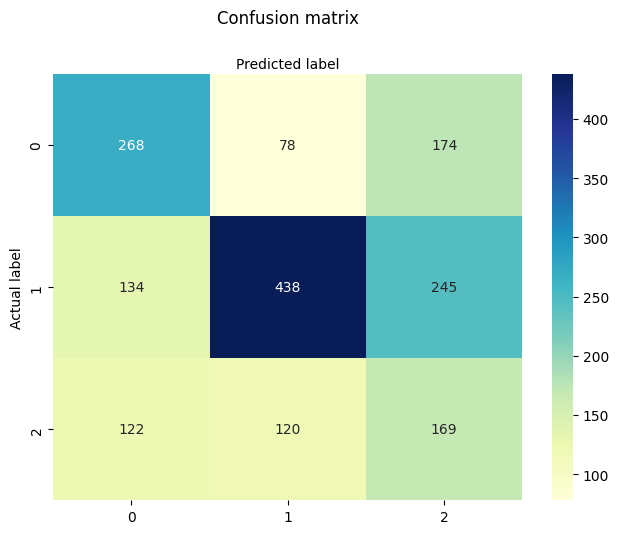

In [17]:
class_names=[0,1,2] # names of classes including Loss, Win, and Draw
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [18]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

print(cnf_matrix)

[[192  24 304]
 [ 59 257 501]
 [ 61  60 290]]


In [19]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", metrics.f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.42276887871853547
Precision: 0.5416090920422866
Recall: 0.4875615135449494
F1 Score: 0.5140685548227548


Text(0.5, 427.9555555555555, 'Predicted label')

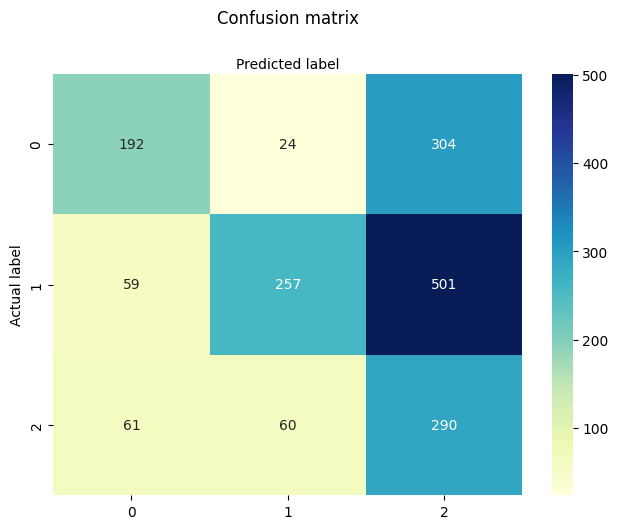

In [20]:
class_names = [0, 1, 2]  # names of classes including Loss, Win, and Draw
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [21]:
from sklearn.decomposition import PCA
def get_results(y_test, Y_pred):
    acc = metrics.accuracy_score(y_test, Y_pred)
    pre = metrics.precision_score(y_test, Y_pred, average='weighted')
    rec = metrics.recall_score(y_test, Y_pred, average='macro')
    fscore = metrics.f1_score(y_test, Y_pred, average='weighted')
    print("Accuracy:", acc)
    print("Precision:", pre)
    print("Recall:", rec)
    print("F1 Score:", fscore)
    return [acc * 100.0, pre * 100.0, rec * 100.0, fscore * 100.0]



def logist_model_training_pca(X, Y):
    n = X.shape[1]
    acc_list = []
    recall_list = []
    precision_list = []
    f1score_list = []
    k_list = []
    for i in range(n):
        print("K =", i+1)
        pca = PCA(n_components=i+1)
        principalComponents = pca.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.20, random_state=0)
        classifier = LogisticRegression(penalty='l2', C=1, solver='lbfgs')
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        acc, precision, recall, f1score = get_results(y_test, y_pred)
        acc_list.append(acc)
        precision_list.append(precision)
        recall_list.append(recall)
        f1score_list.append(f1score)
        k_list.append(i+1)
    high_acc = max(acc_list)
    high_acc_k = acc_list.index(high_acc) + 1
    print("----------------")
    print("Highest Classification Accuracy Achieved:", high_acc, "for K number =", high_acc_k)
    return k_list, acc_list, precision_list, recall_list, f1score_list

def GaussianNB_model_training_pca(X, Y):
    n = X.shape[1]
    acc_list = []
    recall_list = []
    precision_list = []
    f1score_list = []
    k_list = []
    for i in range(n):
        print("K =", i+1)
        pca = PCA(n_components=i+1)
        principalComponents = pca.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.20, random_state=9999)
        classifier = GaussianNB()
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        acc, precision, recall, f1score = get_results(y_test, y_pred)
        acc_list.append(acc)
        precision_list.append(precision)
        recall_list.append(recall)
        f1score_list.append(f1score)
        k_list.append(i+1)
    high_acc = max(acc_list)
    high_acc_k = acc_list.index(high_acc) + 1
    print("----------------")
    print("Highest Classification Accuracy Achieved:", high_acc, "for K number =", high_acc_k)
    return k_list, acc_list, precision_list, recall_list, f1score_list

def plot_result_with_k(k_list, acc_list, precision_list, recall_list, f1score_list):
    plt.plot(k_list, acc_list, label = "Accuracy")
    plt.plot(k_list, precision_list, label = "Precision")
    plt.plot(k_list, recall_list, label = "Recall")
    plt.plot(k_list, f1score_list, label = "F1-Score")
    plt.legend()
    plt.title('Plotting classification accuracy, precision, recall and F1-score over a different number of Ks')
    plt.ylabel('Value')
    plt.xlabel('K')
    plt.show()

In [22]:
k_list, acc_list, precision_list, recall_list, f1score_list  = logist_model_training_pca(X,y)

K = 1


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.4673913043478261
Precision: 0.2184546313799622
Recall: 0.3333333333333333
F1 Score: 0.29774557165861515
K = 2


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.4673913043478261
Precision: 0.32667310293459195
Recall: 0.3393920848633211
F1 Score: 0.3228008891866556
K = 3


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.4662471395881007
Precision: 0.3210739158735025
Recall: 0.33834306248626933
F1 Score: 0.32149919803596616
K = 4


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5549199084668193
Precision: 0.4214714975605557
Recall: 0.46263612968019335
F1 Score: 0.47647200567586806
K = 5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5520594965675057
Precision: 0.42479853214755064
Recall: 0.44941075856008533
F1 Score: 0.46766114746055343
K = 6


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5503432494279176
Precision: 0.42297174298349405
Recall: 0.4479537394470075
F1 Score: 0.4661312447198515
K = 7


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5491990846681922
Precision: 0.42180621896166726
Recall: 0.44737077487995475
F1 Score: 0.4654040892392217
K = 8


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.549771167048055
Precision: 0.42230500544389377
Recall: 0.4480118005209805
F1 Score: 0.4660210028759191
K = 9


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5491990846681922
Precision: 0.42175351755325663
Recall: 0.44760380378495435
F1 Score: 0.46557203541314734
K = 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5503432494279176
Precision: 0.42285808412340303
Recall: 0.44841979725700654
F1 Score: 0.466470035531513
K = 11


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5503432494279176
Precision: 0.4226057458010623
Recall: 0.44865282616200614
F1 Score: 0.4666253359087167
K = 12


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5509153318077803
Precision: 0.42310276672500613
Recall: 0.4492938518030318
F1 Score: 0.46724036147313924
K = 13


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5509153318077803
Precision: 0.4233555028410679
Recall: 0.4490608228980322
F1 Score: 0.4670864894470254
K = 14


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5509153318077803
Precision: 0.42310276672500613
Recall: 0.4492938518030318
F1 Score: 0.46724036147313924
K = 15


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.551487414187643
Precision: 0.42370931911990806
Recall: 0.4494688196340583
F1 Score: 0.4675237123697081
K = 16


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.5491990846681922
Precision: 0.4220374129829533
Recall: 0.44806986159495343
F1 Score: 0.46606224614622266
K = 17


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5509153318077803
Precision: 0.4234977085921557
Recall: 0.4492938518030318
F1 Score: 0.4672646647785369
K = 18


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.549771167048055
Precision: 0.4216724679928828
Recall: 0.44824482942598
F1 Score: 0.46615474391245354
K = 19


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.549771167048055
Precision: 0.42200592510673335
Recall: 0.4484778583309795
F1 Score: 0.46634146003279286
K = 20


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.549771167048055
Precision: 0.42244496965782596
Recall: 0.44824482942598
F1 Score: 0.46633528920378453
K = 21
Accuracy: 0.5520594965675057
Precision: 0.4231982625928726
Recall: 0.4512749898000816
F1 Score: 0.46890555180710625
----------------
Highest Classification Accuracy Achieved: 55.49199084668193 for K number = 4


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


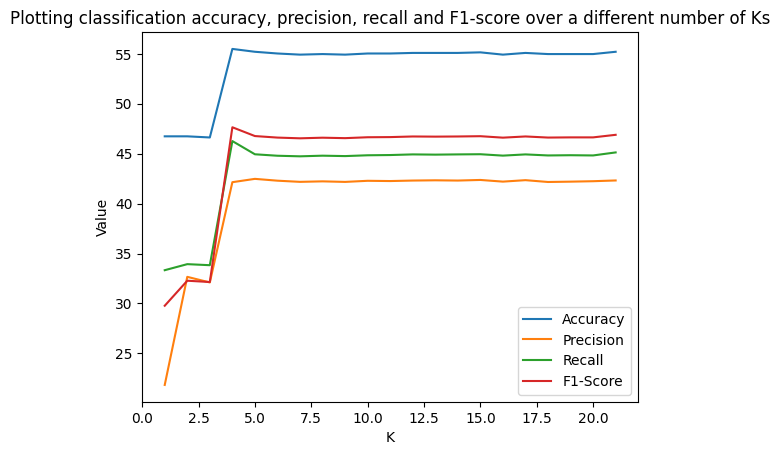

In [23]:
plot_result_with_k(k_list, acc_list, precision_list, recall_list, f1score_list)

In [24]:
k_list, acc_list, precision_list, recall_list, f1score_list  =  GaussianNB_model_training_pca(X, y)

K = 1
Accuracy: 0.459954233409611
Precision: 0.2115578968314229
Recall: 0.3333333333333333
F1 Score: 0.28981442293207466
K = 2


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.45652173913043476
Precision: 0.31923491312728075
Recall: 0.33851926806644744
F1 Score: 0.3207253259390527
K = 3
Accuracy: 0.4548054919908467
Precision: 0.31659213626580296
Recall: 0.33684918158735516
F1 Score: 0.3181738754621537
K = 4
Accuracy: 0.4874141876430206
Precision: 0.40606825289818477
Recall: 0.43998697660473524
F1 Score: 0.4276969915249842
K = 5
Accuracy: 0.5268878718535469
Precision: 0.5015974872201022
Recall: 0.4342710044076095
F1 Score: 0.469059207648625
K = 6
Accuracy: 0.4742562929061785
Precision: 0.5283370396395671
Recall: 0.4731748842550765
F1 Score: 0.4770899460039057
K = 7
Accuracy: 0.4399313501144165
Precision: 0.5102187502682165
Recall: 0.4414526105014342
F1 Score: 0.42064157765622906
K = 8
Accuracy: 0.4439359267734554
Precision: 0.516473334975818
Recall: 0.4435931721537591
F1 Score: 0.42036583186055143
K = 9
Accuracy: 0.42734553775743706
Precision: 0.4944134177095931
Recall: 0.4255939832716964
F1 Score: 0.3914407165186318
K = 10
Accuracy: 0.42906178489

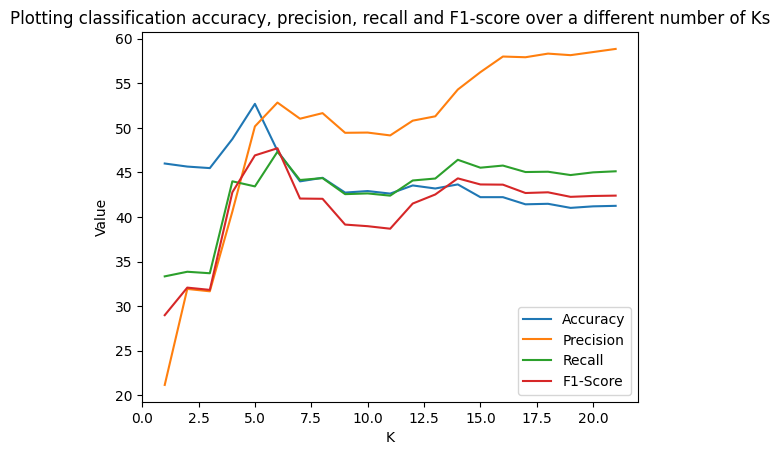

In [25]:
plot_result_with_k(k_list, acc_list, precision_list, recall_list, f1score_list)

Break

In [92]:

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import time
     

t_c = torch.tensor(X_train, dtype=torch.float32)
t_u = torch.tensor(y_train, dtype=torch.long)
t_c_test = torch.tensor(X_test, dtype=torch.float32)
t_u_test = torch.tensor(y_test.values, dtype=torch.long)


     

train_dataset = TensorDataset(t_c, t_u)
test_dataset = TensorDataset(t_c_test, t_u_test)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


In [89]:
for inputs, _ in train_loader:
    batch_size = inputs.size(0)
    num_channels = inputs.size(1)
    height = inputs.size(2)
    width = inputs.size(3)
    print("Batch size:", batch_size)
    print("Number of channels:", num_channels)
    print("Height:", height)
    print("Width:", width)
    break


torch.Size([64, 21])


In [93]:
def train_model(n_epochs, train_loader, valid_loader, model, optimizer, loss_fn, device):
    start = time.time()
    for epoch in range(n_epochs):
        model.train()
        running_train_loss = 0.0
        for imgs, labels in train_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item()
        avg_train_loss = running_train_loss / len(train_loader)

        model.eval()
        running_valid_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for imgs, labels in valid_loader:
                imgs, labels = imgs.to(device), labels.to(device)
                outputs = model(imgs)
                loss = loss_fn(outputs, labels)
                running_valid_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)
        avg_valid_loss = running_valid_loss / len(valid_loader)
        accuracy = correct / total

        print(f'Epoch [{epoch+1}/{n_epochs}], '
              f'Train Loss: {avg_train_loss:.4f}, '
              f'Validation Loss: {avg_valid_loss:.4f}, '
              f'Accuracy: {accuracy:.4f}')

    stop = time.time()
    print(f'Training completed in: {stop - start}s')

In [94]:
train_model(300, train_loader, test_loader, model, optimizer, loss_fn, device)

Epoch [1/300], Train Loss: 1.0233, Validation Loss: 1.0060, Accuracy: 0.5029
Epoch [2/300], Train Loss: 1.0089, Validation Loss: 1.0073, Accuracy: 0.5011
Epoch [3/300], Train Loss: 1.0101, Validation Loss: 1.0048, Accuracy: 0.4989
Epoch [4/300], Train Loss: 1.0077, Validation Loss: 1.0035, Accuracy: 0.5120
Epoch [5/300], Train Loss: 1.0081, Validation Loss: 1.0036, Accuracy: 0.4983
Epoch [6/300], Train Loss: 1.0095, Validation Loss: 1.0050, Accuracy: 0.4989
Epoch [7/300], Train Loss: 1.0093, Validation Loss: 1.0042, Accuracy: 0.5063
Epoch [8/300], Train Loss: 1.0069, Validation Loss: 1.0051, Accuracy: 0.4954
Epoch [9/300], Train Loss: 1.0068, Validation Loss: 1.0048, Accuracy: 0.5006
Epoch [10/300], Train Loss: 1.0076, Validation Loss: 1.0036, Accuracy: 0.5011
Epoch [11/300], Train Loss: 1.0055, Validation Loss: 1.0044, Accuracy: 0.5120
Epoch [12/300], Train Loss: 1.0078, Validation Loss: 1.0048, Accuracy: 0.5046
Epoch [13/300], Train Loss: 1.0081, Validation Loss: 1.0035, Accuracy: 0.


Model Performance Metrics:
--------------------------------------------------
Accuracy: 0.5109
Precision (Weighted): 0.5224
Precision (Macro): 0.4776
Recall (Weighted): 0.5109
Recall (Macro): 0.4797
F1 Score (Weighted): 0.5150
F1 Score (Macro): 0.4772
--------------------------------------------------



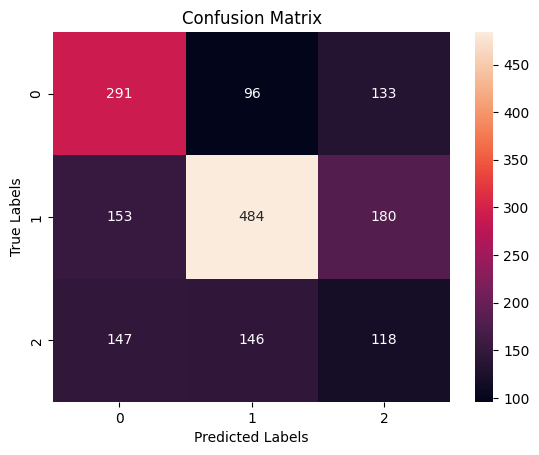

In [95]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, data_loader, device):
    model.eval()
    true_labels = []
    predicted_labels = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            true_labels.extend(labels.cpu().numpy())
            predicted_labels.extend(predicted.cpu().numpy())

    accuracy = accuracy_score(true_labels, predicted_labels)
    precision_weighted = precision_score(true_labels, predicted_labels, average='weighted')
    precision_macro = precision_score(true_labels, predicted_labels, average='macro')
    recall_weighted = recall_score(true_labels, predicted_labels, average='weighted')
    recall_macro = recall_score(true_labels, predicted_labels, average='macro')
    f1_weighted = f1_score(true_labels, predicted_labels, average='weighted')
    f1_macro = f1_score(true_labels, predicted_labels, average='macro')

    metrics = {
        'Accuracy': accuracy,
        'Precision (Weighted)': precision_weighted,
        'Precision (Macro)': precision_macro,
        'Recall (Weighted)': recall_weighted,
        'Recall (Macro)': recall_macro,
        'F1 Score (Weighted)': f1_weighted,
        'F1 Score (Macro)': f1_macro
    }

    cm = confusion_matrix(true_labels, predicted_labels)

    print("\nModel Performance Metrics:")
    print("--------------------------------------------------")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print("--------------------------------------------------\n")

    sns.heatmap(cm, annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

    return metrics

metrics = evaluate_model(model, test_loader, device)